In [1]:
# Import the libraries

import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#this is sample data
#from nltk.corpus import names  

from string import punctuation

#if the next cell does not work
#remove number symbol on following lines and re-run this cell
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('names')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')

import matplotlib.pyplot as plt

%matplotlib inline

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#load the data from the .csv file and review the data

filepath = "datasets/women_clothing_review.csv"
df = pd.read_csv(filepath) #this file is encoded differently

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# check the NaN values

pd.isna(df['Review Text']).count()

23486

In [4]:
# Fill NaN value with the blank

df.fillna('',inplace=True)

In [5]:
#initilize function to do sentiment analysis

sid = SentimentIntensityAnalyzer()

In [6]:
#list of english stopwords

eng_stopwords = stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
# function to clean up each review
# then it will analyze and assign a sentiment polarity

def reviewSentiment(review):
    #print(review)
    #for line in review:
        #cline = line.strip() #get rid of newline character
    
        #if review == '': pass
        #else:
        #make text lowercase
        review = review.lower()

        #tokenize the review
        tknz_review = word_tokenize(review)

        #remove puntuation
        for token in tknz_review:
            if token in punctuation:
                tknz_review.remove(token)

        clean_tokens = []
        #remove filler words
        for token in tknz_review:
            if token not in eng_stopwords:
                clean_tokens.append(token)

        #put sentence back together with remaining clean words
        #clean_review = ' '.join(tknz_review)
        #clean_review = ' '.join(tknz_review)
        clean_review = ' '.join(clean_tokens)

        #turn into textblob
        sid_rev = sid.polarity_scores(clean_review)

        #get sentiment polarity
        r_comp = sid_rev['compound']

        return r_comp

In [8]:
#create a new column to hold sentiment value from function
df['review_sentiment'] = df['Review Text'].apply(reviewSentiment)

In [9]:
#verify sentiment values in new column
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_sentiment
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8991
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9710
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117


In [10]:
# function to assign a polarity category to the sentiment
def sentimentCategory(sent_num):
    if sent_num >= 0.2:
        return "positive"
    if sent_num <= -0.2:
        return "negative"
    else:
        return "neutral"

In [11]:
#create a new column to hold sentiment category
df['sentiment_category'] = df['review_sentiment'].apply(sentimentCategory)

In [12]:
df['Review Text'].iloc[23478]

'I was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return.'

In [13]:
df['review_sentiment'].iloc[23478]

-0.3169

In [14]:
df['sentiment_category'].iloc[23478]

'negative'

In [15]:
df['Review Text'].iloc[23480]

''

In [16]:
df['review_sentiment'].iloc[23480]

0.0

In [17]:
df['sentiment_category'].iloc[23480]

'neutral'

In [18]:
#count frequency of positive, negative, and neutral reviews
df['sentiment_category'].value_counts()

positive    21380
neutral      1562
negative      544
Name: sentiment_category, dtype: int64

In [19]:
# percent of frequency of positive, negative, and neutral reviews 
df['sentiment_category'].value_counts(normalize=True)

positive    0.910330
neutral     0.066508
negative    0.023163
Name: sentiment_category, dtype: float64

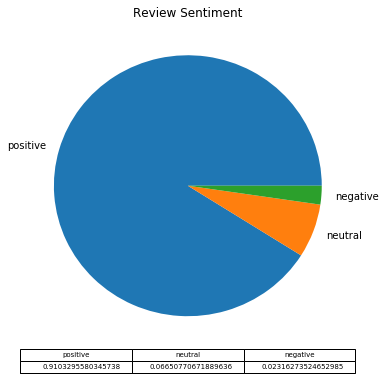

In [20]:
# plot pie chart
df['sentiment_category'].value_counts(normalize=True).plot(kind='pie', figsize = (6,6), use_index=False, title='Review Sentiment',  table=True,  label='')

In [21]:
# new data frame for with just review type and percent
dfplot = pd.DataFrame(columns=['Review', 'Percent'])
dfplot['Review'] = df['sentiment_category'].unique().tolist()
dfplot['Percent'] = df['sentiment_category'].value_counts(normalize=True).unique().tolist()

In [22]:
dfplot

,Review,Percent
0,positive,0.910330
1,neutral,0.066508
2,negative,0.023163


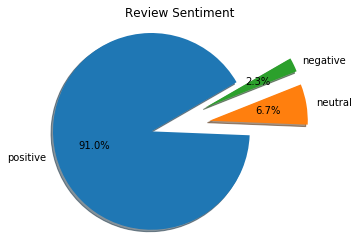

In [23]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = dfplot['Review']
sizes = dfplot['Percent']
explode = (0.1, 0.5, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Review Sentiment')

plt.show()

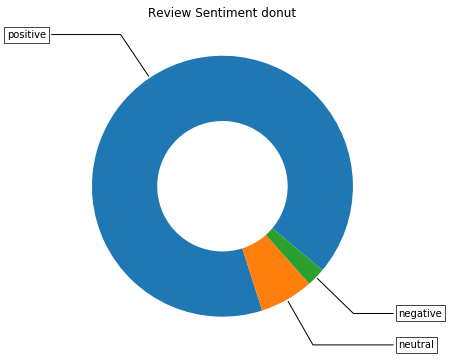

In [24]:
# donut Pie chart

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

reviewtype = dfplot['Review']
reviewpercent = dfplot['Percent']

wedges, texts = ax.pie(dfplot['Percent'], wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(reviewtype[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Review Sentiment donut")

plt.show()